# Creating time series forecasting model using Bitcoin dataset

Data is downloaded from https://www.kaggle.com/datasets/hansangho/bitcoindata

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
prices = pd.read_csv('/Users/thamxiangcong/Downloads/Bitcoin_historical_data.csv')

In [3]:
prices.head()

,Day,Close,Open,Average,HighValue,LowValue,Unnamed: 6,Unnamed: 7,Unnamed: 8,Change%,Volume
0,2022-10-08,"19,522.60","19,530.20","19,526.40","19,612.20","19,432.60",230.15,230150,NaN,-0.04%,NaN
1,2022-10-07,"19,531.30","19,962.40","19,746.85","20,051.40","19,352.10",263.5,263500,NaN,-2.13%,NaN
2,2022-10-06,"19,956.70","20,157.50","20,057.10","20,436.70","19,873.70",370.6,370600,NaN,-1.00%,NaN
3,2022-10-05,"20,157.50","20,340.50","20,249.00","20,353.80","19,761.70",352.76,352760,NaN,-0.90%,NaN
4,2022-10-04,"20,340.20","19,629.70","19,984.95","20,436.10","19,506.40",368.17,368170,NaN,3.63%,NaN


In [4]:
prices.tail()

,Day,Close,Open,Average,HighValue,LowValue,Unnamed: 6,Unnamed: 7,Unnamed: 8,Change%,Volume
3198,2014-01-05,"1,014.70",924.7,969.7,"1,029.90",911.4,21.37,21370,NaN,9.74%,NaN
3199,2014-01-04,924.7,884.3,904.5,932.2,848.3,14.24,14240,NaN,4.57%,NaN
3200,2014-01-03,884.3,856.9,870.6,888.2,839.4,9.71,9710,NaN,3.19%,NaN
3201,2014-01-02,856.9,815.9,836.4,886.2,810.5,12.81,12810,NaN,5.02%,NaN
3202,2014-01-01,815.9,805.9,810.9,829.9,771,10.76,10760,NaN,1.24%,NaN


In [5]:
prices.describe()

,Unnamed: 8,Volume
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [6]:
prices.drop(columns=['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Change%', 'Volume'], axis=1, inplace=True)

In [7]:
prices

,Day,Close,Open,Average,HighValue,LowValue
0,2022-10-08,"19,522.60","19,530.20","19,526.40","19,612.20","19,432.60"
1,2022-10-07,"19,531.30","19,962.40","19,746.85","20,051.40","19,352.10"
2,2022-10-06,"19,956.70","20,157.50","20,057.10","20,436.70","19,873.70"
3,2022-10-05,"20,157.50","20,340.50","20,249.00","20,353.80","19,761.70"
4,2022-10-04,"20,340.20","19,629.70","19,984.95","20,436.10","19,506.40"
...,...,...,...,...,...,...
3198,2014-01-05,"1,014.70",924.7,969.7,"1,029.90",911.4
3199,2014-01-04,924.7,884.3,904.5,932.2,848.3
3200,2014-01-03,884.3,856.9,870.6,888.2,839.4
3201,2014-01-02,856.9,815.9,836.4,886.2,810.5


In [8]:
prices.isna().sum()

Day          0
Close        0
Open         0
Average      0
HighValue    0
LowValue     0
dtype: int64

In [9]:
prices.dtypes

Day          object
Close        object
Open         object
Average      object
HighValue    object
LowValue     object
dtype: object

In [10]:
prices['Day'] = pd.to_datetime(prices.Day)

In [11]:
prices.dtypes

Day          datetime64[ns]
Close                object
Open                 object
Average              object
HighValue            object
LowValue             object
dtype: object

In [12]:
prices['Close'] = prices['Close'].replace(',', '', regex=True).values

In [13]:
prices['Close']=prices['Close'].astype(float)

In [14]:
prices.dtypes

Day          datetime64[ns]
Close               float64
Open                 object
Average              object
HighValue            object
LowValue             object
dtype: object

In [15]:
prices['Open'] = prices['Open'].replace(',', '', regex=True).values

In [16]:
prices['Open']=prices['Open'].astype(float)

In [17]:
prices['Average'] = prices['Average'].replace(',', '', regex=True).values

In [18]:
prices['Average']=prices['Average'].astype(float)

In [19]:
prices['HighValue'] = prices['HighValue'].replace(',', '', regex=True).values

In [20]:
prices['HighValue']=prices['HighValue'].astype(float)

In [21]:
prices['LowValue'] = prices['LowValue'].replace(',', '', regex=True).values

In [22]:
prices['LowValue']=prices['LowValue'].astype(float)

In [23]:
prices.dtypes

Day          datetime64[ns]
Close               float64
Open                float64
Average             float64
HighValue           float64
LowValue            float64
dtype: object

<AxesSubplot:title={'center':'Bitcoin Price'}, xlabel='Day', ylabel='Close'>

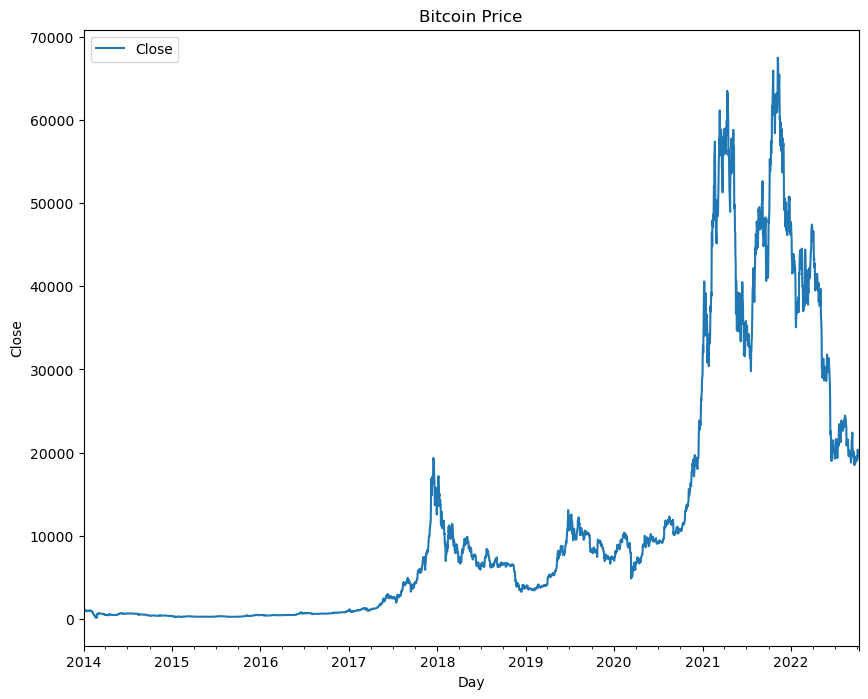

In [24]:
# plotting the data
prices.plot(title = "Bitcoin Price", x = "Day", y = "Close", figsize = (10,8), ylabel = "Close")

In [25]:
# Calculate OHLC Average
prices['OHLC'] = (prices['Open'] + prices['HighValue'] + prices['LowValue'] + prices['Close'])/4

In [26]:
prices

,Day,Close,Open,Average,HighValue,LowValue,OHLC
0,2022-10-08,19522.6,19530.2,19526.40,19612.2,19432.6,19524.400
1,2022-10-07,19531.3,19962.4,19746.85,20051.4,19352.1,19724.300
2,2022-10-06,19956.7,20157.5,20057.10,20436.7,19873.7,20106.150
3,2022-10-05,20157.5,20340.5,20249.00,20353.8,19761.7,20153.375
4,2022-10-04,20340.2,19629.7,19984.95,20436.1,19506.4,19978.100
...,...,...,...,...,...,...,...
3198,2014-01-05,1014.7,924.7,969.70,1029.9,911.4,970.175
3199,2014-01-04,924.7,884.3,904.50,932.2,848.3,897.375
3200,2014-01-03,884.3,856.9,870.60,888.2,839.4,867.200
3201,2014-01-02,856.9,815.9,836.40,886.2,810.5,842.375


In [27]:
# Caluclate 30-day close simple moving average (SMA)
prices['30SMA_Close'] = prices.iloc[:,2].rolling(window = 30).mean()      

In [28]:
# Caluclate 30-day close simple moving average (SMA) of OHLC
prices['30SMA_OHLC'] = prices.iloc[:,7].rolling(window = 30).mean()      

In [29]:
prices

,Day,Close,Open,Average,HighValue,LowValue,OHLC,30SMA_Close,30SMA_OHLC
0,2022-10-08,19522.6,19530.2,19526.40,19612.2,19432.6,19524.400,NaN,NaN
1,2022-10-07,19531.3,19962.4,19746.85,20051.4,19352.1,19724.300,NaN,NaN
2,2022-10-06,19956.7,20157.5,20057.10,20436.7,19873.7,20106.150,NaN,NaN
3,2022-10-05,20157.5,20340.5,20249.00,20353.8,19761.7,20153.375,NaN,NaN
4,2022-10-04,20340.2,19629.7,19984.95,20436.1,19506.4,19978.100,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3198,2014-01-05,1014.7,924.7,969.70,1029.9,911.4,970.175,944.533333,758.639333
3199,2014-01-04,924.7,884.3,904.50,932.2,848.3,897.375,942.233333,773.106667
3200,2014-01-03,884.3,856.9,870.60,888.2,839.4,867.200,939.450000,787.172111
3201,2014-01-02,856.9,815.9,836.40,886.2,810.5,842.375,935.353333,800.663000


In [30]:
prices.isna().sum()

Day             0
Close           0
Open            0
Average         0
HighValue       0
LowValue        0
OHLC            0
30SMA_Close    29
30SMA_OHLC     58
dtype: int64

It is noted that the first 58 rows contain null values. To obtain the most accuate analysis from data, the first 58 rows that contain null values will be dropped.

In [31]:
prices = prices.dropna().reset_index().drop("index", axis = 1)
prices.head()

,Day,Close,Open,Average,HighValue,LowValue,OHLC,30SMA_Close,30SMA_OHLC
0,2022-08-11,23935.3,23963.3,23949.30,24873.5,23864.0,24159.025,21398.670000,20276.020556
1,2022-08-10,23962.9,23150.3,23556.60,24209.9,22714.7,23509.450,21526.386667,20333.500111
2,2022-08-09,23146.7,23818.1,23482.40,23912.0,22886.5,23440.825,21677.606667,20396.296667
3,2022-08-08,23816.3,23175.3,23495.80,24234.1,23160.6,23596.575,21823.906667,20465.276667
4,2022-08-07,23175.3,22944.2,23059.75,23387.7,22852.3,23089.875,21928.933333,20538.162111


In [32]:
prices.dtypes

Day            datetime64[ns]
Close                 float64
Open                  float64
Average               float64
HighValue             float64
LowValue              float64
OHLC                  float64
30SMA_Close           float64
30SMA_OHLC            float64
dtype: object

# Formulating predictive model using linear regression

In [33]:
mms = MinMaxScaler()
mms.fit(prices[['30SMA_OHLC', '30SMA_Close', 'Close']])
prices[['30SMA_OHLC', '30SMA_Close', 'Close']] = mms.transform(prices[['30SMA_OHLC', '30SMA_Close', 'Close']])

In [34]:
X = prices[['30SMA_OHLC', '30SMA_Close']]
y = prices['Close']
X.head()

,30SMA_OHLC,30SMA_Close
0,0.327263,0.338602
1,0.328202,0.340644
2,0.329227,0.343063
3,0.330353,0.345402
4,0.331544,0.347082


In [35]:
y.head()

0    0.353382
1    0.353791
2    0.341684
3    0.351617
4    0.342109
Name: Close, dtype: float64

In [36]:
lr = LinearRegression()
lr.fit(X,y)
y_preds = lr.predict(X)

In [37]:
mean_squared_error(y, y_preds)

0.0007389871228903044

Text(0.5, 0, 'Day')

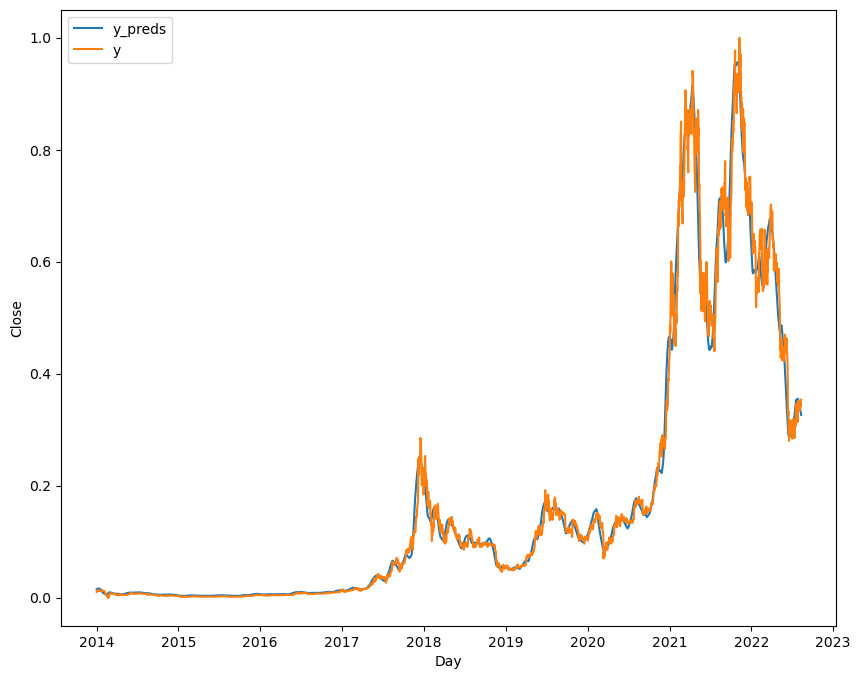

In [38]:
# Plot graph
plt.figure(figsize = (10,8))
plt.plot(prices['Day'], y_preds, label = "y_preds")
plt.plot(prices['Day'], y, label = "y")
plt.legend()
plt.ylabel("Close")
plt.xlabel("Day")

The linear regression looks like a good predictive model.